In [12]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline 

In [31]:
dataFolder = Path.cwd().joinpath('Data')

In [32]:
df = pd.read_csv(dataFolder.joinpath('label.csv'))

In [33]:
df = df[['user_id', 'label']] #removing unnecessary columns

In [34]:
df.head()

,user_id,label
0,3187755,unknown
1,12609678,public administration and social service profe...
2,41055794,biological and biomedical sciences
3,8477334,unknown
4,1281279,unknown


In [35]:
len(df.user_id)

53340

In [36]:
len(df.user_id.unique())

52956

In [37]:
df[df.duplicated(['user_id'], keep=False)].sort_values(by='user_id').head(10)

,user_id,label
17638,1220705,unknown
23959,1220705,unknown
4351,1241455,unknown
11979,1241455,unknown
50766,1245485,unknown
46376,1245485,unknown
15946,1538829,social sciences
16362,1538829,public administration and social service profe...
43973,1554997,unknown
2896,1554997,unknown


In [38]:
df[df.duplicated(['user_id'], keep=False)].sort_values(by='user_id').tail(10)

,user_id,label
11156,50398757,unknown
39265,50398757,education
17585,50438677,public administration and social service profe...
53247,50438677,psychology
34720,50469691,biological and biomedical sciences
18737,50469691,unknown
28078,50971835,psychology
9603,50971835,education
39805,52082683,education
397,52082683,psychology


In [39]:
df = df.drop_duplicates(keep='first') # drop duplicate rows but keep the ones with different label

In [40]:
len(df)

53238

In [41]:
len(df.user_id.unique())

52956

In [42]:
userDf = pd.read_csv(dataFolder.joinpath('user_profile.csv'))

In [45]:
userDf = userDf[['user_id', 'gender', 'gpa']]
userDf.head()

,user_id,gender,gpa
0,8838926,female,3.6
1,1525079,female,3.5
2,4513255,female,3.0
3,23554544,female,2.7
4,3416751,female,2.2


In [50]:
userDf = pd.merge(df, userDf, on='user_id')

In [52]:
userDf.head()

,user_id,label,gender,gpa
0,3187755,unknown,female,3.3
1,12609678,public administration and social service profe...,female,3.8
2,41055794,biological and biomedical sciences,male,3.2
3,8477334,unknown,female,3.4
4,1281279,unknown,female,3.5


In [53]:
userDf.label.value_counts()

unknown                                                 26568
psychology                                               7039
education                                                6908
biological and biomedical sciences                       4446
social sciences                                          3940
public administration and social service professions     2354
visual and performing arts                               1798
personal and culinary services                            185
Name: label, dtype: int64

In [54]:
userDf.gender.value_counts()

female    27934
male      25304
Name: gender, dtype: int64

/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Distribution of gender by major')

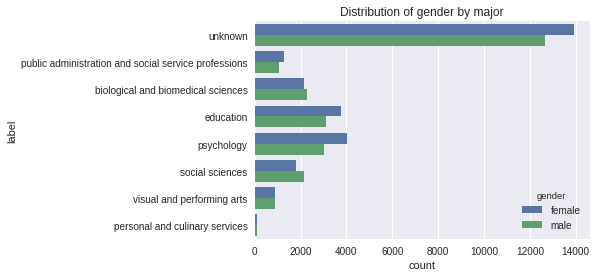

In [60]:
g = sns.countplot(y="label", hue="gender", data=userDf)
g.set_title("Distribution of gender by major" )

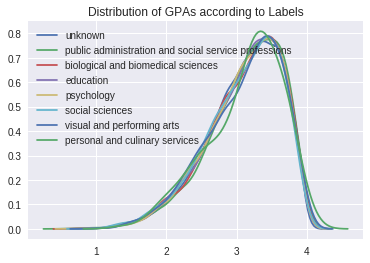

In [67]:
for major in userDf.label.unique().tolist():
    g = sns.kdeplot(userDf[userDf.label==major].gpa, label= major)
g.set_title('Distribution of GPAs according to Labels')
plt.legend(loc='upper left')


In [71]:
with open(dataFolder.joinpath('bk_details.json'), 'r') as f:
    json_data = f.read()
data = json.loads(json_data)

In [73]:
booksDf = pd.DataFrame(data)

In [83]:
booksDf["book_type"] = booksDf.book_subject_code.str[:3]
booksDf.head()

,book_id,book_subject_code,book_title,book_type
0,22250675,EDU029000,Learning Disabilities and Related Mild Disabil...,EDU
1,42510,SCI055000,Physics for Scientists & Engineers (Chs 1-37),SCI
2,46792,ART000000,Drawing to See,ART
3,33143135,REL006000,Living God's Word,REL
4,34466221,HIS037000,Sources in Patterns of World History,HIS


In [84]:
booksDf.book_type.unique()

array(['EDU', 'SCI', 'ART', 'REL', 'HIS', 'HEA', 'REF', 'LAN', 'SOC',
       'PSY', 'SEL', 'MUS', 'FOR', 'LCO', 'POL', 'LAW', 'MED', 'BUS',
       'DRA', 'PER', nan, 'PHI', 'BIO', 'FIC', 'MAT', 'COM', 'SPO', 'BIB',
       'JUV', 'OCC', 'POE', 'LIT', 'CGN', 'ARC', 'FAM', 'NAT', 'TEC',
       'JNF', 'HUM', 'TRU', 'DES', 'TRV', 'CKB', 'PHO', 'STU', 'CRA',
       'GAM', 'PET', 'GAR', 'NON', 'HOM', 'TRA', 'CUR', 'YAN'],
      dtype=object)

In [92]:
len(booksDf[booksDf.book_type.isnull()])

371